In [1]:
import uncertainties.unumpy as unp
import uncertainties as u
from uncertainties.umath import log

from PIL import Image
from uncertainties import ufloat
import numpy as np
import pandas as pd
import scipy as sp
import kafe2
import matplotlib.pyplot as plt
import os
import glob
import struct
import sympy
from scipy.optimize import curve_fit
from scipy import special
from pathlib import Path
from scipy.ndimage import gaussian_filter
import scipy.constants as const



In [2]:
directory =  Path().resolve()/Path("162")
directory_img =  Path().resolve()/Path("img")
if not os.path.exists(directory_img):
    os.makedirs(directory_img)
cloaking_files = [Path(x) for x in sorted(glob.glob(os.path.join(directory, '*.png')), key=os.path.getmtime, reverse=True) if "c_" in x]
diff_files = [Path(x) for x in sorted(glob.glob(os.path.join(directory, '*.png')), key=os.path.getmtime, reverse=True) if "r_" in x]
print (diff_files, cloaking_files)

[WindowsPath('C:/Users/jonah/OneDrive/Dokumente/WS 24/P3/Optische tarnkappe/162/r_03_55565.png'), WindowsPath('C:/Users/jonah/OneDrive/Dokumente/WS 24/P3/Optische tarnkappe/162/r_025_46867.png'), WindowsPath('C:/Users/jonah/OneDrive/Dokumente/WS 24/P3/Optische tarnkappe/162/r_02_37499.png'), WindowsPath('C:/Users/jonah/OneDrive/Dokumente/WS 24/P3/Optische tarnkappe/162/r_015_36161.png'), WindowsPath('C:/Users/jonah/OneDrive/Dokumente/WS 24/P3/Optische tarnkappe/162/r_01_24787.png'), WindowsPath('C:/Users/jonah/OneDrive/Dokumente/WS 24/P3/Optische tarnkappe/162/r_0_5382-99.png')] [WindowsPath('C:/Users/jonah/OneDrive/Dokumente/WS 24/P3/Optische tarnkappe/162/c_3_65601-6.png'), WindowsPath('C:/Users/jonah/OneDrive/Dokumente/WS 24/P3/Optische tarnkappe/162/c_2_65601-6.png'), WindowsPath('C:/Users/jonah/OneDrive/Dokumente/WS 24/P3/Optische tarnkappe/162/c_1_65601-6.png'), WindowsPath('C:/Users/jonah/OneDrive/Dokumente/WS 24/P3/Optische tarnkappe/162/c_0_65601-6.png'), WindowsPath('C:/Users

In [3]:
def filters(f1=True, f2=True, f3=True):
    filtering = 1
    if f1:
        filtering*=0.1
    if f2:
        filtering*=0.01
    if f3:
        filtering*=0.001
    return 1/filtering
print(filters(1,0,0))

10.0


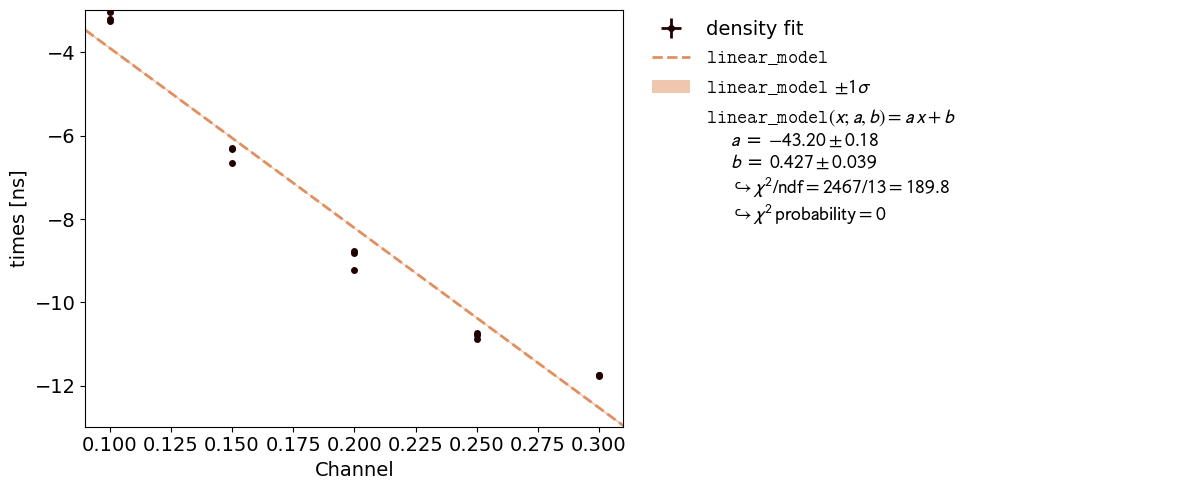

In [4]:
density0 = np.array([4.20, 4.17, 3.80])*1e5*filters(1,1,1) ### filter 1,2,3
density01 = np.array([1.58, 1.96, 1.68])*1e5*filters(0,1,1) ### filter 2,3
density015 = np.array([5.20, 7.51, 7.40])*1e5*filters(0,0,1) ### filter 3
density02 = np.array([4.04, 6.36, 6.07])*1e5*filters(0,1,0) ### filter 3

density025 = np.array([8.79, 7.65, 8.34])*1e5*filters(1,0,0) ### filter 2
density03 = np.array([3.19, 3.12, 3.19])*1e5*filters(1,0,0) ### filter 2

density03_alt = np.array([3.19, 3.12, 3.19])*1e5*filters(0,1,0) ### filter 2  way back 2.02e5

len3 = np.array([3.14, 3.44, 4.21])*1e5*filters(0,1,0) ### filter 2 
len2 = np.array([8.63, 8.6, 8.38])*1e5*filters(0,1,0) ### filter 2 0.3 error

## 15 pm0.5 


densety_arr = np.vstack((density01,density015,density02,density025,density03))


# plt.plot(np.mean(densety_arr, axis=1)/np.mean(density0), "*")
# plt.yscale("log")

# plt.show()
x_vals =  [0.1, 0.1, 0.1, 0.15, 0.15, 0.15,0.2, 0.2, 0.2, 0.25, 0.25, 0.25,0.3, 0.3, 0.30]


data = kafe2.XYContainer( x_vals, np.log(densety_arr/np.mean(density0)).ravel())
data.label = 'density fit'
#print(times_cal_arr)
data.add_error('y', 0.05)


fit_density = kafe2.Fit(data)
fit_density.do_fit()
p = kafe2.Plot(fit_density)
p.y_label = 'times [ns]'
p.x_label = 'Channel' 
p.plot()
plt.savefig(directory_img/Path("density fit"))

plt.show()



In [5]:
def getMeanColors(image_path, color = (1,1,1), vbar = (0.4,0.6), axis=1, height=False):

    color = np.array(color, dtype=bool)

    img = Image.open(image_path)
    img_array = np.array(img) ###  array with shape (px_x, px_y, 3) with rgb values
    if isinstance(vbar, int):
        if axis==0:
            mean_colors = np.mean(img_array[:,vbar,color], axis=(1,2))
        else:
            mean_colors = np.mean(img_array[vbar:,color], axis=(1,2))


    else:
        vbar_mask = np.array(np.shape(img_array)[1]*np.array(vbar), dtype=int)
        if axis==0:
            mean_colors = np.mean(img_array[:,vbar_mask[0]:vbar_mask[1],color], axis=(1,2))
        else:
            mean_colors = np.mean(img_array[vbar_mask[0]:vbar_mask[1],:,color], axis=(0,2))
    if height:
        mean_height = np.mean(mean_colors)
        return mean_colors*height/mean_height
    return mean_colors



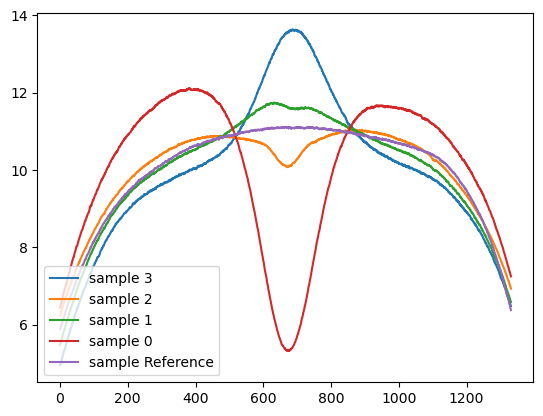

In [6]:
for file in cloaking_files:
    name = (file.stem).split("_")[1]
    plt.plot(getMeanColors(file, (1,1,1), height=10) ,label =  "sample "+name)

plt.legend(loc='lower left')
plt.show()

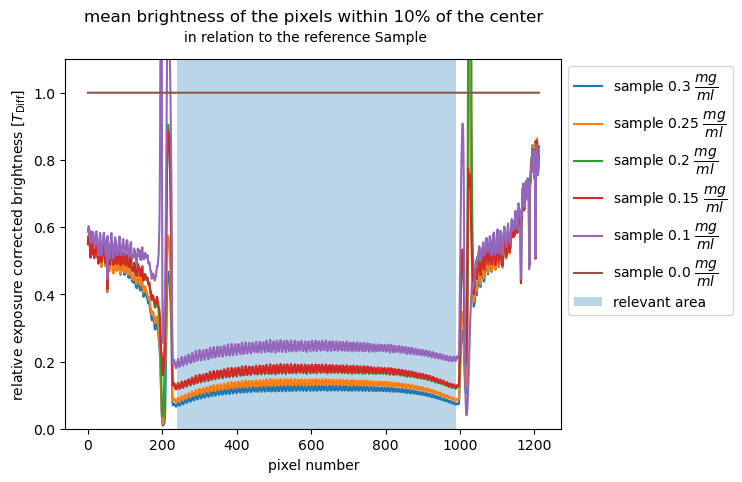

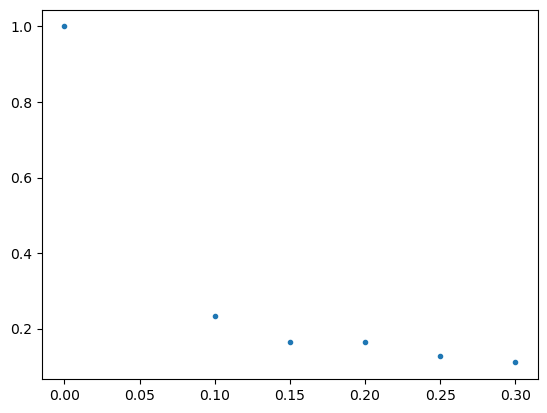

[0.11013361425492472, 0.1260010206484244, 0.163351748110498, 0.16559921118442908, 0.23368348345293044, 1.0] [0.3, 0.25, 0.2, 0.15, 0.1, 0.0]


In [7]:
transmission = dict()
brightness_y = []
brightness_x = []
for file in diff_files:

    name = float((file.stem).split("_")[1])/10
    if name >=1:
        name=name/10
    name = str(name)

    exposure = float( ((file.stem).split("_")[2]).replace("-", ".") )
    transmission[name] = getMeanColors(file, (1,1,1))/exposure
start=240
end = 990
for key in list(transmission.keys()):
    plt.plot(transmission[key]/transmission["0.0"] ,label =  "sample "+ key + R" $\dfrac{mg}{ml}$")

    brightness_y.append(np.mean((transmission[key]/transmission["0.0"])[start:end]  ))
    brightness_x.append(float(key))

plt.fill_between((start, end), 3, alpha =0.3, label="relevant area")
plt.ylim(0,1.1)
plt.legend(bbox_to_anchor=(1, 1.))
plt.title(R"mean brightness of the pixels within 10% of the center", y=1.08)
plt.suptitle("in relation to the reference Sample", y=0.94, size = 10)
plt.xlabel("pixel number")
plt.ylabel(R"relative exposure corrected brightness [$T_\mathrm{Diff}$]")
plt.show()
plt.plot(brightness_x, brightness_y, ".")
plt.show()
print(brightness_y,brightness_x)

$$K = \frac{c_0}{2 n_1 A}$$
$$T_{Diff}= \frac{1}{2+\frac{K\cdot L}{D}}$$
$$D = \frac{v}{3 \mu_t}$$
$$\mu_s = N C_S$$

$$\Rightarrow T_{Diff}= \frac{1}{2+\frac{K\cdot L \cdot 3 N\cdot C_S}{v}}$$

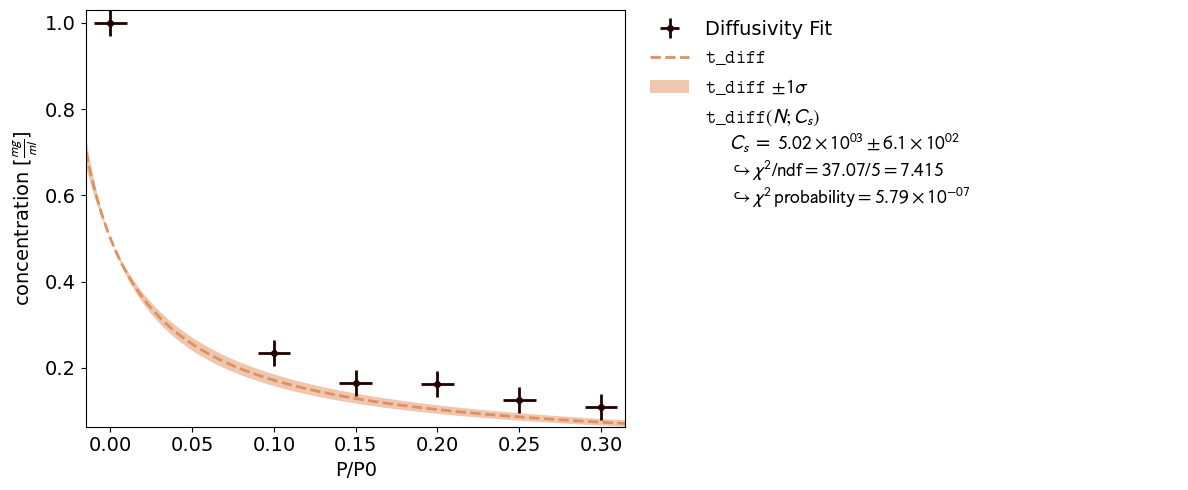

In [21]:
c_0 = const.c
n_1=1.4
A = 2.95
L = 0.015
K= c_0/(2*n_1*A)

def t_diff(N, C_s):
    return 1/(2 + (K*L*3*N*C_s*n_1)/c_0)

data = kafe2.XYContainer(brightness_x, brightness_y)
data.label = 'Diffusivity Fit' 
data.add_error('x', 0.01)
data.add_error('y', 0.03)
fit_c = kafe2.Fit(data,t_diff)
fit_c.do_fit()
p = kafe2.Plot(fit_c)
p.x_label = 'P/P0'
p.y_label = R'concentration [$\frac{mg}{ml}$]' 
p.plot()
plt.savefig(directory_img/Path("concetration fit"))

plt.show()